<a href="https://colab.research.google.com/github/LoveMeWithoutAll/keraspp/blob/feature%2Fstudy-ch04/CNN_classification_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras import layers, models

class CNN(models.Sequential):
  def __init__(self, input_shape, num_classes):
    super().__init__()

    self.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
    self.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
    self.add(layers.MaxPooling2D(pool_size=(2,2)))
    self.add(layers.Dropout(0.25))
    
    self.add(layers.Flatten())

    self.add(layers.Dense(128, activation='relu'))
    self.add(layers.Dropout(0.5))
    self.add(layers.Dense(num_classes, activation='softmax'))

    self.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

Using TensorFlow backend.


In [0]:
from keras import datasets
from keras import backend

class DATA():
  def __init__(self):
    num_classes = 10
    (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
    img_rows, img_cols = x_train.shape[1:]
    if backend.image_data_format() == 'channels_first':
      x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
      x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
      input_shape = (1, img_rows, img_cols)
    else:
      x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
      x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
      input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)

    self.input_shape = input_shape
    self.num_classes = num_classes
    self.x_train, self.y_train = x_train, y_train
    self.x_test, self.y_test = x_test, y_test

In [0]:
import matplotlib.pyplot as plt

def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()

In [0]:
def main():
  batch_size = 128
  epochs = 10

  data = DATA()
  model = CNN(data.input_shape, data.num_classes)

  history = model.fit(data.x_train, data.y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

  score = model.evaluate(data.x_test, data.y_test)
  print()
  print('Test Loss', score[0])
  print('Test Accuracy', score[1])

  plot_acc(history)
  plt.show()

  plot_loss(history)
  plt.show()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





48000/48000 [==============================] - 8s 157us/step - loss: 0.2991 - acc: 0.9074 - val_loss: 0.0675 - val_acc: 0.9806
Epoch 2/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.0961 - acc: 0.9716 - val_loss: 0.0555 - val_acc: 0.9842
Epoch 3/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.0703 - acc: 0.9790 - val_loss: 0.0441 - val_acc: 0.9876
Epoch 4/10
48000/48000 [==============================] - 4s 86us/step - loss: 0.0567 - acc: 0.9831 - val_loss: 0.0423 - val_acc: 0.9879
Epoch 5/10
48000/48000 [==============================] - 4s 85us/step - loss: 0.0486 - acc: 0.9849 - val_loss: 0.0415 - val_acc: 0.9884
Epoch 6/10
48000/48000 [================

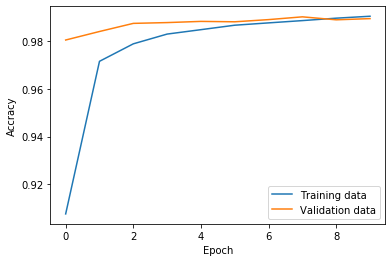

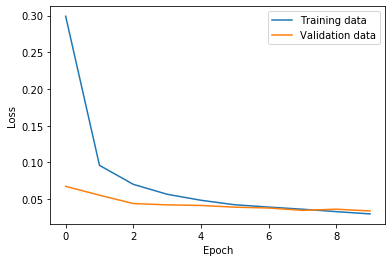

In [0]:
if __name__ =='__main__':
  main()